# The Sparks Foundation #GRIP21

## Task1:Prediction Using Supervised Machine Learning

### Aim of the project:To Predict the percentage of an student based on the no. of study hours.What will be predicted score if a student studies for 9.25 hrs/ day?

#### Simple Linear Regression: In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

##### Linear Regression: In statistics, simple linear regression is a linear regression model with a single explanatory variable.That is, it concerns two-dimensional sample points with one independent variable and one dependent variable (conventionally, the x and y coordinates in a Cartesian coordinate system) and finds a linear function (a non-vertical straight line) that, as accurately as possible, predicts the dependent variable values as a function of the independent variable. The adjective simple refers to the fact that the outcome variable is related to a single predicto

<img src="25262.jpg" style="width:800px;height:450px"/>

##### Author: Hemanth Kumar Bolli

##### For Github file

##### For Youtube Video

In [2]:
#Importing The Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the data from the given link
url="http://bit.ly/w-data"
student_data=pd.read_csv(url)

In [6]:
#Checking the first 10 rows of the dataset
student_data.head(n=10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
#Checking the last 10 rows of the dataset
student_data.tail(n=10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
#Length of the dataset
student_data.shape

(25, 2)

In [10]:
student_data.info()#Checking the type of data we have in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
student_data.dtypes #data types

Hours     float64
Scores      int64
dtype: object

In [14]:
student_data.describe().transpose()# Pandas describe() is used to view some basic statistical details like percentile, mean, std etc.

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [15]:
student_data.isnull().sum()#Null values

Hours     0
Scores    0
dtype: int64

### Data Visualization

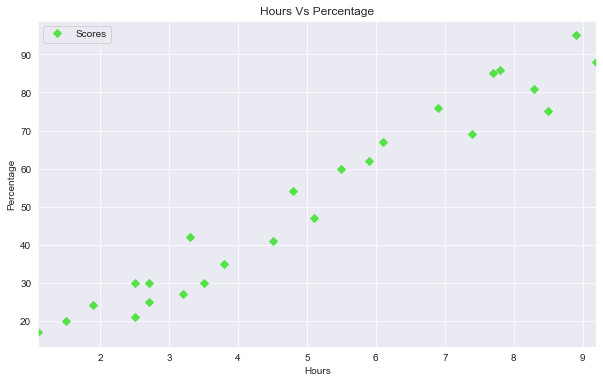

In [137]:
student_data.plot(x='Hours',y='Scores',style='D',color='#54e346')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
sns.set_style('darkgrid')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

###### **From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

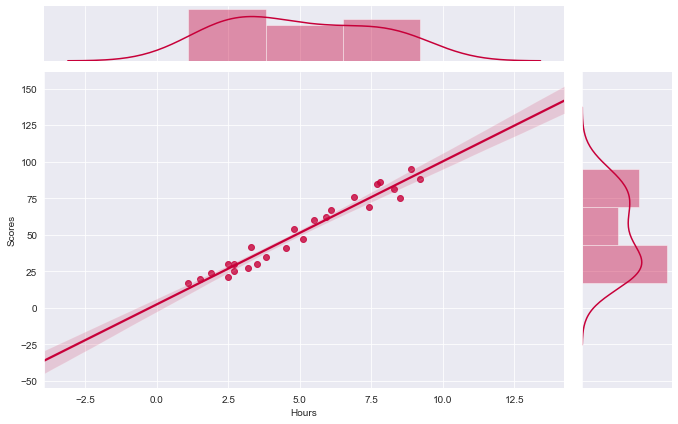

In [136]:
#Visualizing the data using a jointplot
sns.jointplot(x="Hours", y="Scores", data=student_data, kind="reg",color='#c70039');
sns.set_style('darkgrid')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

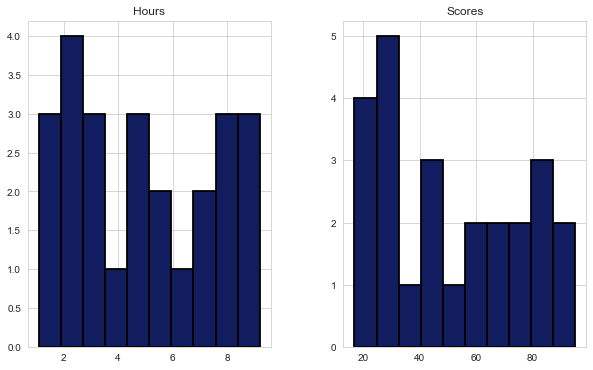

In [104]:
#Visualizing the data using histogram
student_data.hist(edgecolor='black', bins=10,color='#111d5e',linewidth=1.8)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

##### Preparing The Data

In [56]:
#Dividing the dataset into two parts:X and Y
X=student_data.iloc[:,:-1].values
Y=student_data.iloc[:,1].values

In [57]:
#splitting the data into training and test using sciktlearn libraries
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=100)

In [60]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
regressor.coef_
regressor.intercept_
y_pred=regressor.predict(X_test)

In [62]:
#predicting the values
y_pred

array([28.47723743, 39.31685466, 34.38975592, 60.01066938, 16.65220044,
       74.79196561, 69.86486686])

In [66]:
#intercept value
print(regressor.intercept_)#value of b

1.87090421597631


In [67]:
#coefficient value
print(regressor.coef_)#value of w

[9.85419749]


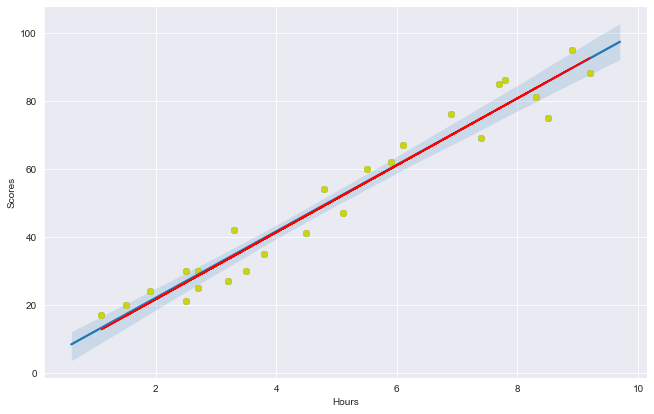

In [138]:
#plotting the line
line=regressor.coef_*X+regressor.intercept_
#plotting the test data
g = sns.lmplot(x="Hours", y="Scores", data=student_data)
plt.scatter(X,Y,color='#cad315')
plt.plot(X,line,color='r')
sns.set_style('whitegrid')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [89]:
regressor.score(X_train,Y_train) #score of train data

0.9550521319661627

In [91]:
regressor.score(X_test,Y_test) #score of test data

0.9403157736545142

In [92]:
#comparing actual and predicted values
student_data_new=pd.DataFrame({'Actual':Y_test,'predicted':y_pred})
student_data_new

,Actual,predicted
0,25,28.477237
1,35,39.316855
2,42,34.389756
3,62,60.010669
4,20,16.652200
5,69,74.791966
6,76,69.864867


In [85]:
#solving the problem statement
#What will be predicted score if a student studies for 9.25 hrs/ day?
predicted_score=regressor.predict([[9.25]])
predicted_score
print('The predicted score is  = {}'.format(predicted_score[0]))

The predicted score is  = 93.02223095414202


##### Thus from the above score if a student studying for 9.25hrs/day has a predicted percentage of 93%

###### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [86]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,y_pred))

Mean Absolute Error: 4.666937869822485


In [88]:
#RMSE
print('Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Root Mean Square Error: 4.999916451372887


# Thank You For Watching !!